# Gray-level reduction

This code is an implementation to show how gray-level reduction works for an image using the thresholding method.

## Loading image

In [38]:
import cv2
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
matplotlib.rcParams.update({'font.size': 12, 'font.family': 'serif'})
plt.rcParams['figure.dpi'] = 300
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

# Load the grayscale image unchanged.
img = cv2.imread('Figures/Fig221jpg.jpg', -1)

The `-1` is used to load the image unchanged. We obtain the same effect if we use the `cv2.IMREAD_UNCHANGED` argument.

We can see that the shape of the image does not include the three channels as when we load the image with color (using the argument`1`or `cv2.IMREAD_COLOR`).

In [16]:
img.shape

(452, 374)

## Function to reduce gray intensity levels

In [32]:
# Inputs: intensity levels and the image.

def intensity_levels(n, img):
    
    # Image normalized according to the dynamic range.
    img_reduced = img.copy()*(n/256)

    for row in range(img.shape[0]):
        for column in range(img.shape[1]):
            px = img_reduced[row][column]
            for i in range(n):
                # Lower limit.
                if px == 0:
                    px = 0
                # Upper limit.
                elif px == n:
                    px = n-1
                elif px > i and px <= i+1:
                    px = i
                img_reduced[row][column] = px

    return img_reduced

## Results

CPU times: user 283 ms, sys: 15.6 ms, total: 298 ms
Wall time: 293 ms


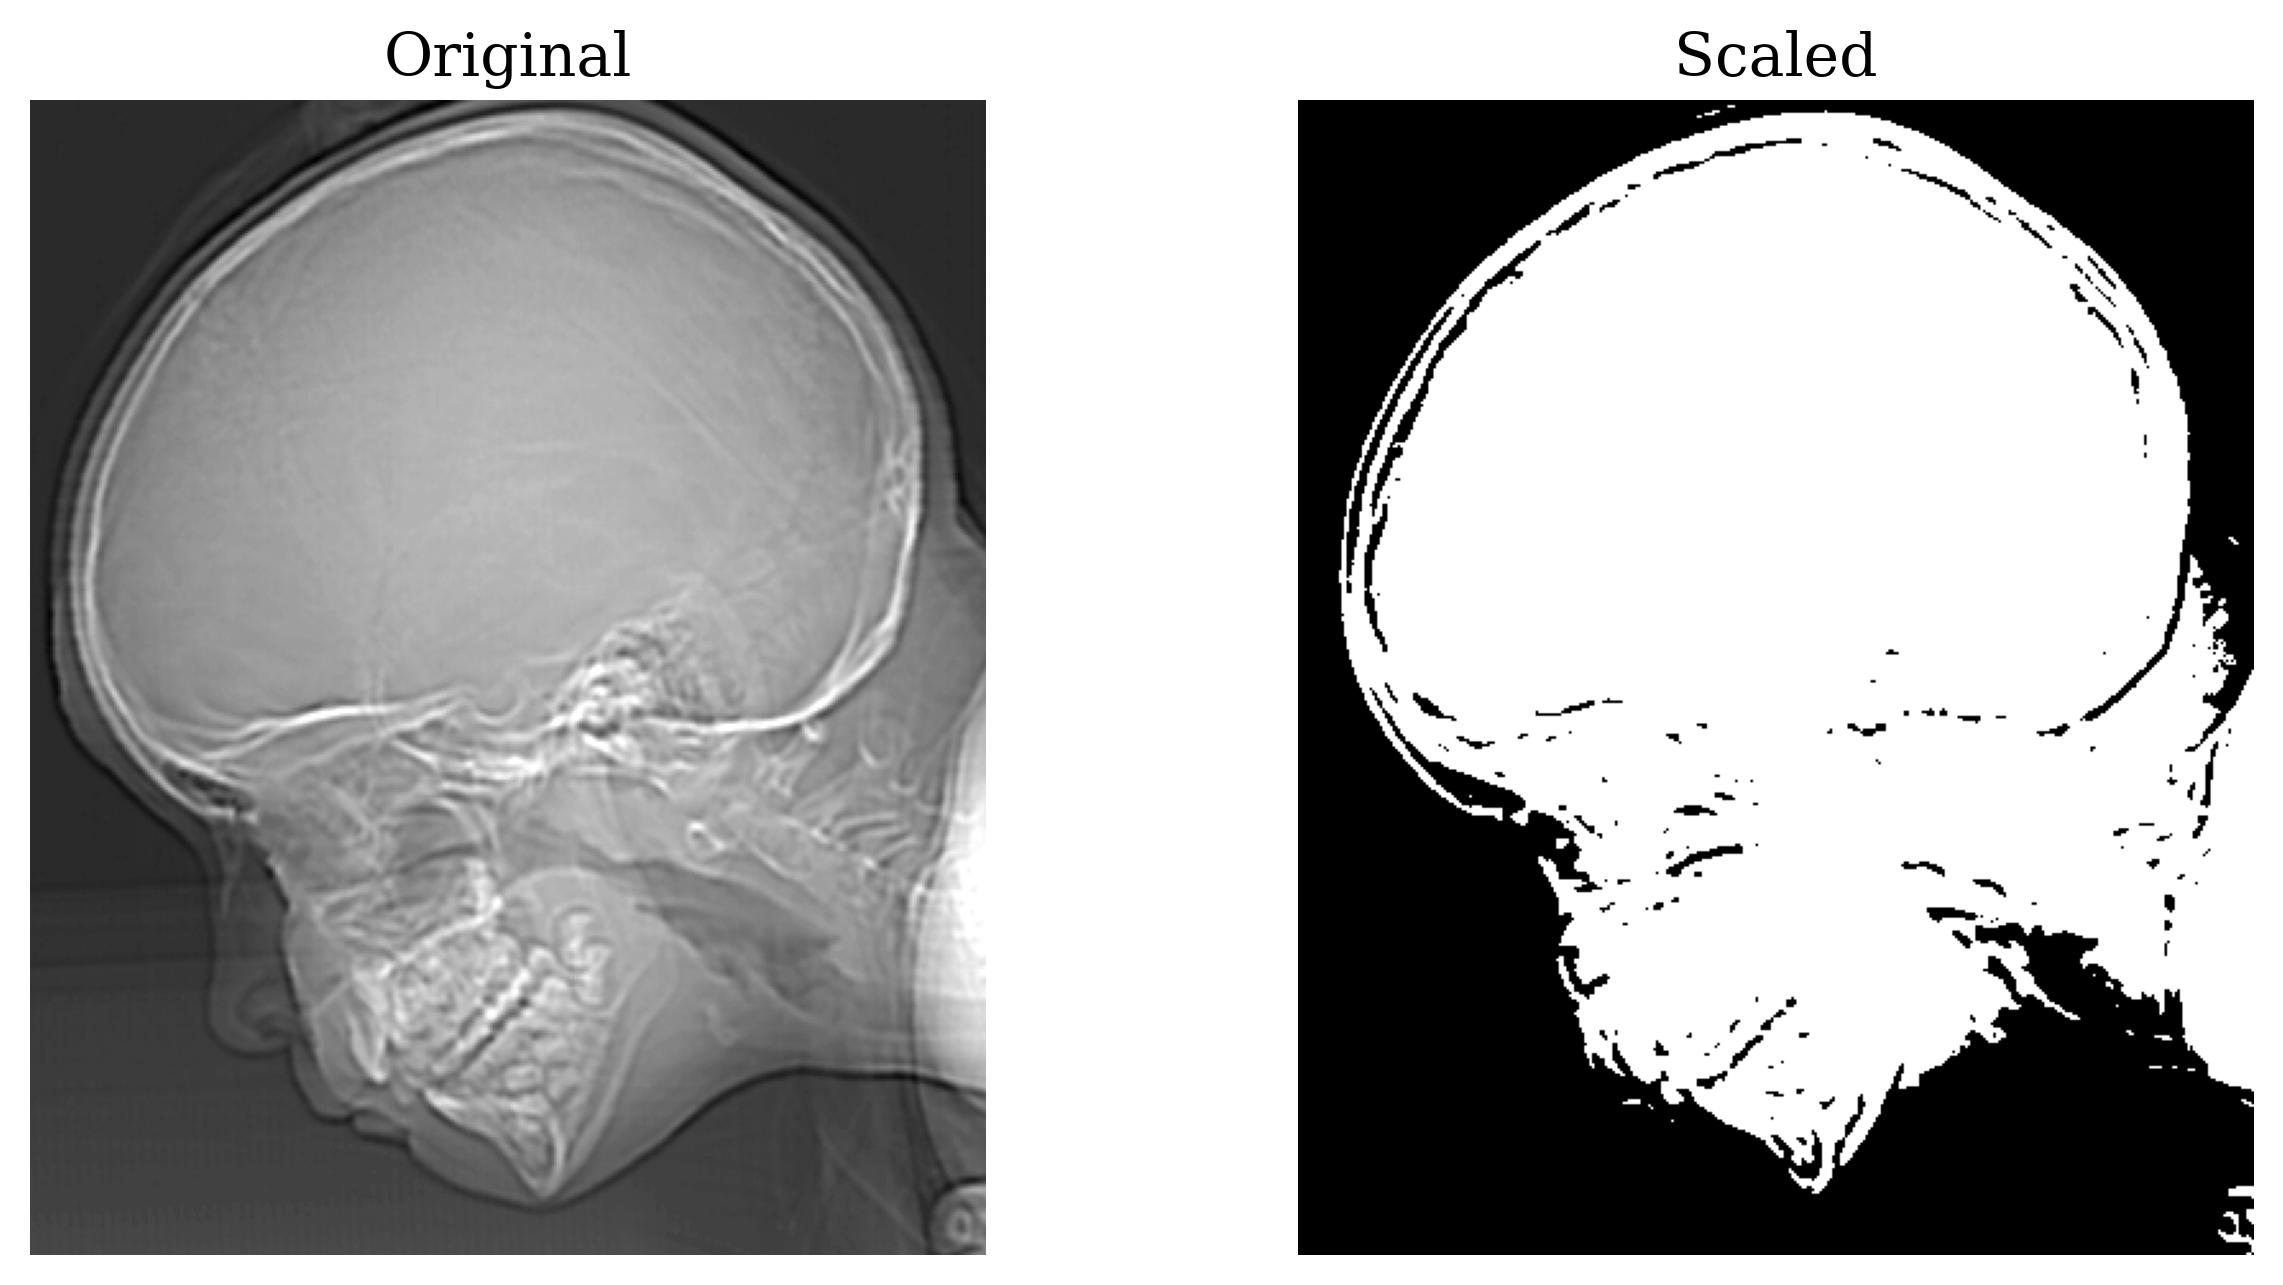

In [43]:
%%time

plt.figure(1, figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Original')
plt.axis('off')
plt.imshow(img, cmap = 'gray')
plt.subplot(1, 2, 2)
plt.title('Scaled')
plt.axis('off')
plt.imshow(intensity_levels(2, img), cmap = 'gray')

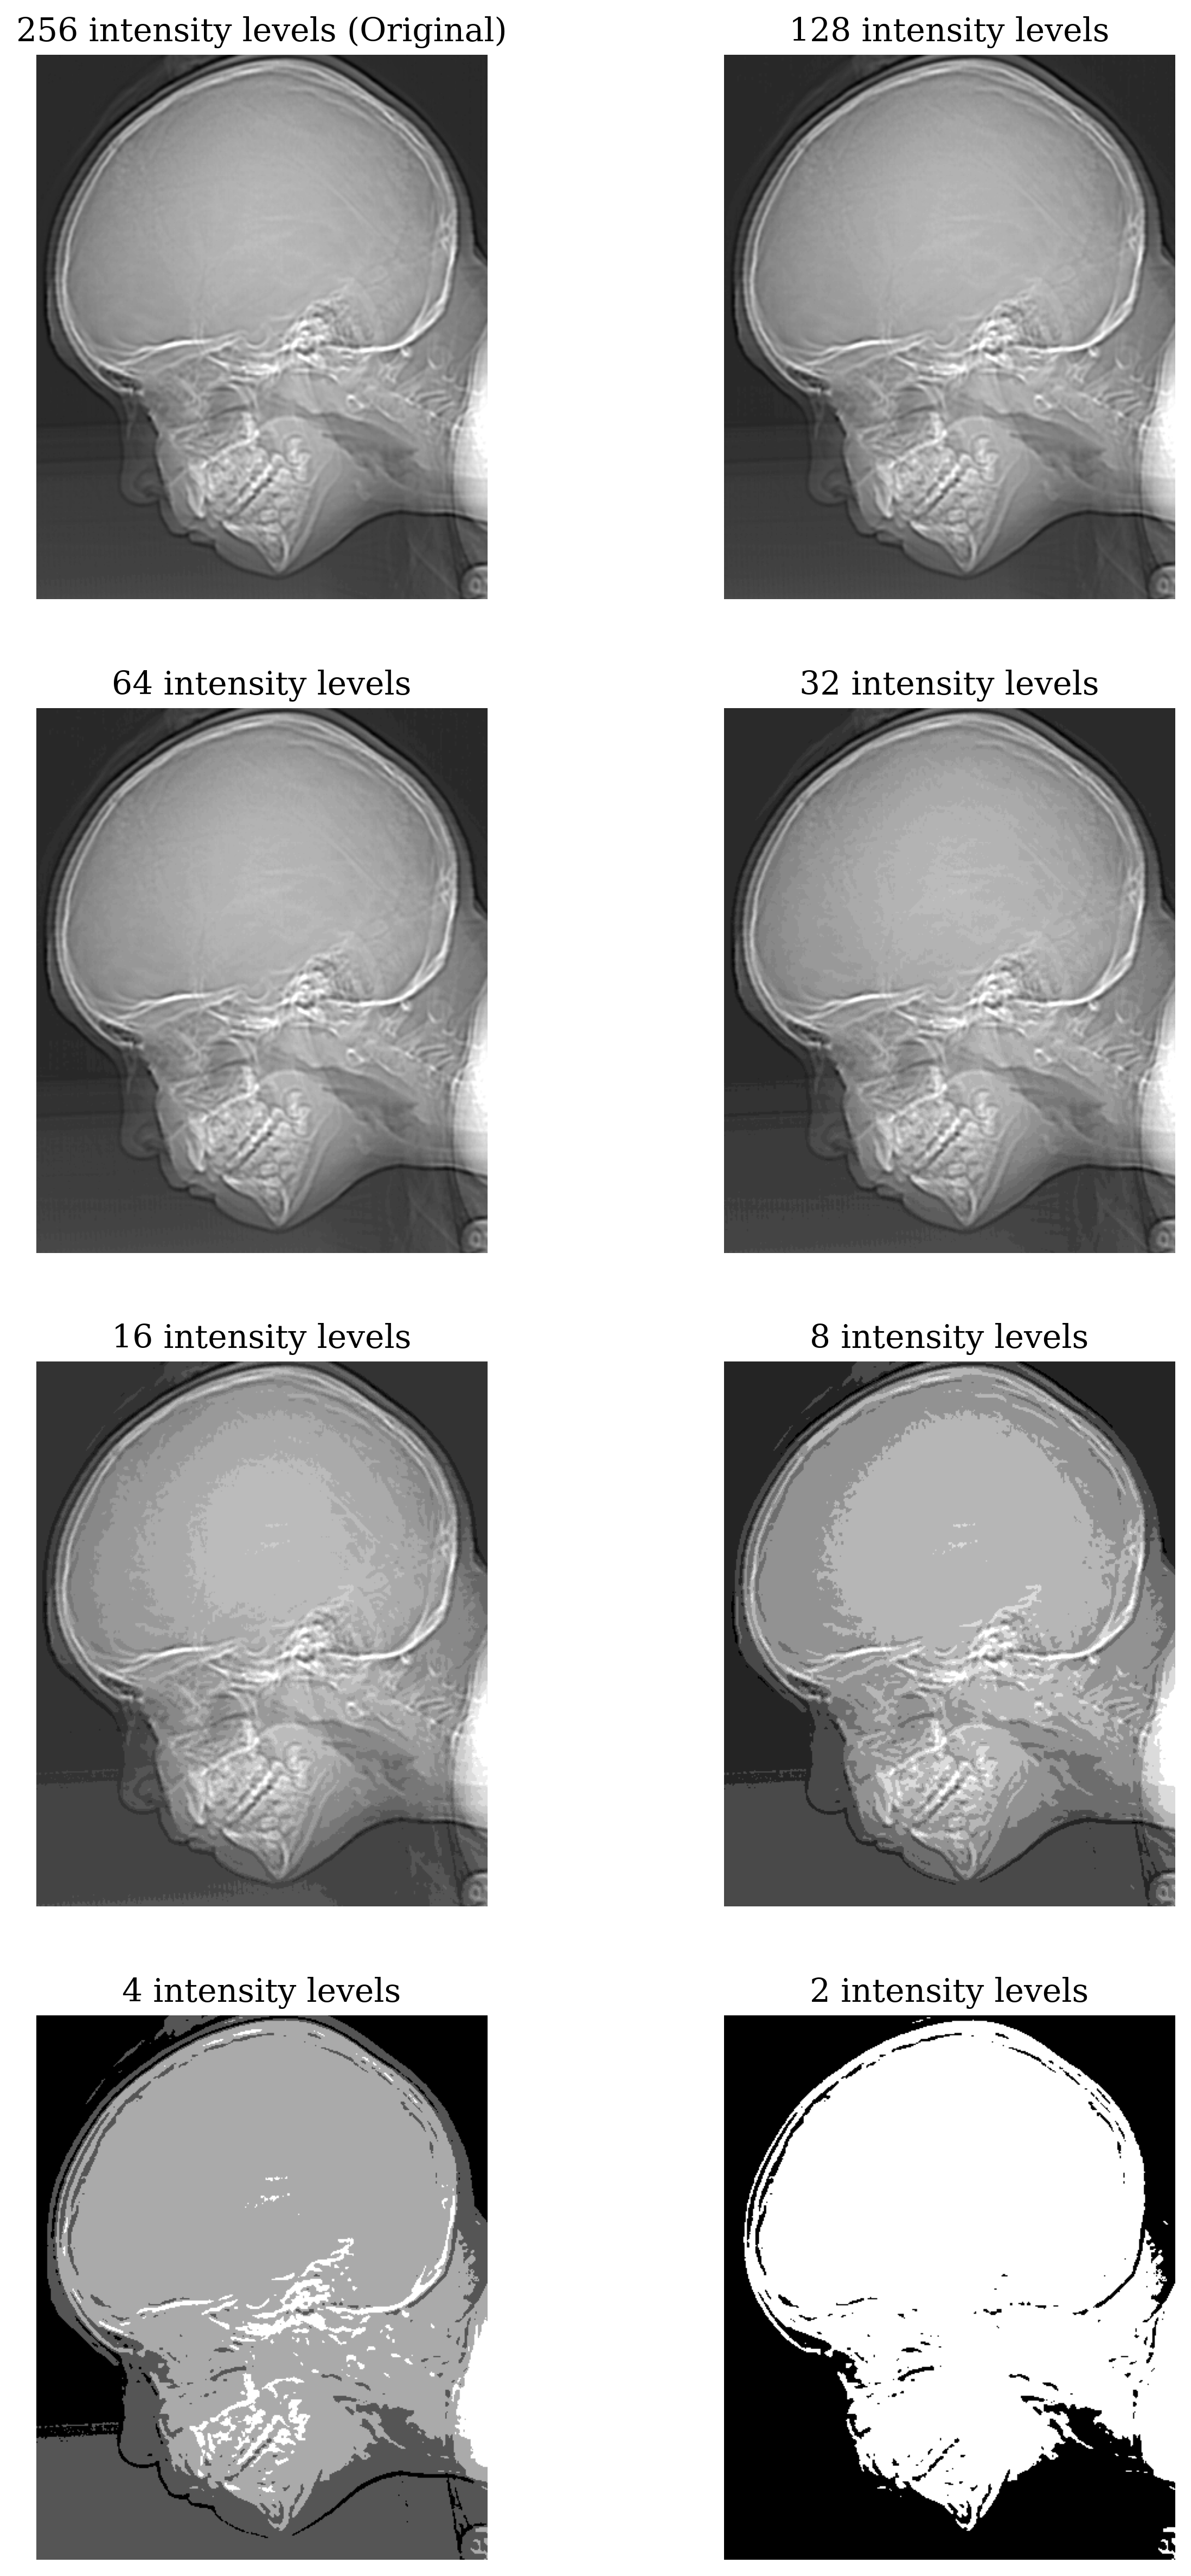

In [44]:
plt.figure(1, figsize=(10,20))

for i in range(1,9):
    
    n = 2**(9-i)
    
    if i == 1:
        plt.subplot(4, 2, 1)
        plt.title('256 intensity levels (Original)')
        plt.axis('off')
        plt.imshow(img, cmap = 'gray')
    else:
        plt.subplot(4, 2, i)
        plt.title(f'{n} intensity levels')
        plt.axis('off')
        plt.imshow(intensity_levels(n,img), cmap = 'gray')